# MCMC: Metropolis-Hastings

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def target_distribution(x):
    """Define the target distribution we want to sample from.
    This could be any probability distribution function.
    For example, let's use a normal distribution centered at 0 with standard deviation 1."""
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def proposal_distribution(x, step_size=1.0):
    """Generate a new sample from the proposal distribution.
    Here we use a normal distribution centered around the current sample."""
    return np.random.normal(x, step_size)

def metropolis_hastings(target_dist, proposal_dist, initial_sample, n_samples, step_size=1.0):
    samples = [initial_sample]
    current_sample = initial_sample

    for _ in range(n_samples - 1):
        proposed_sample = proposal_dist(current_sample, step_size)
        acceptance_ratio = target_dist(proposed_sample) / target_dist(current_sample)
        
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample
        
        samples.append(current_sample)

    return np.array(samples)

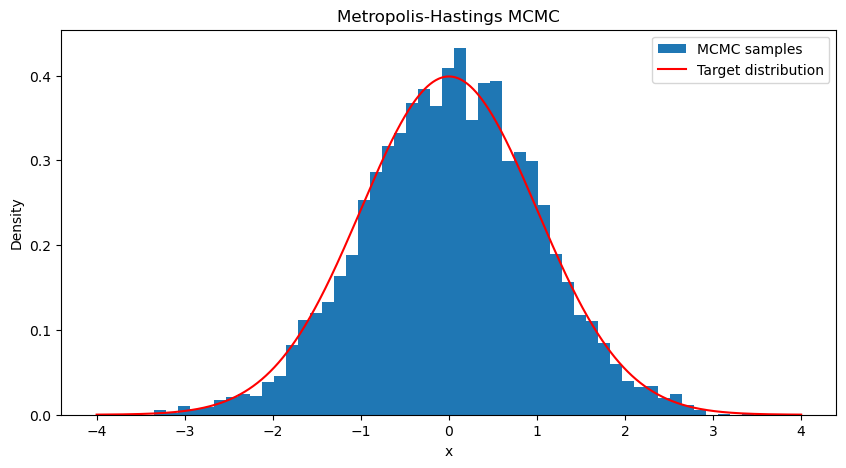

In [14]:


# Parameters
initial_sample = 0.0
n_samples = 10000
step_size = 1.0

# Generate samples
samples = metropolis_hastings(target_distribution, proposal_distribution, initial_sample, n_samples, step_size)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot the histogram of the samples
plt.hist(samples, bins=50, density=True, label='MCMC samples')

# Plot the target distribution
x = np.linspace(-4, 4, 1000)
plt.plot(x, target_distribution(x), label='Target distribution', color='red')

plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings MCMC')
plt.show()
